Assignment

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

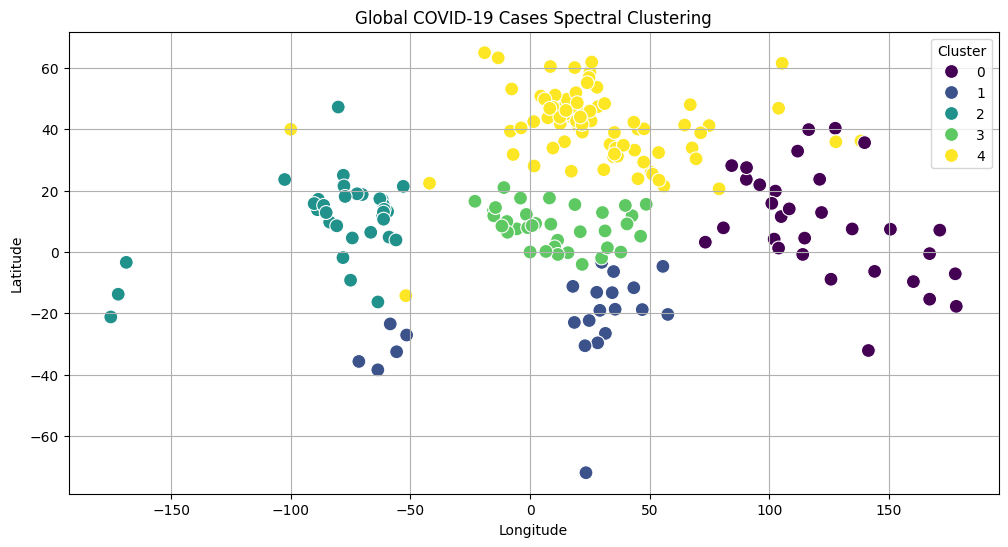

In [4]:
# First, let's read the uploaded file to understand its structure and content.
import pandas as pd

# Path to the uploaded file
file_path = './time_series_covid19_confirmed_global.csv'

# Reading the file
covid_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe
covid_data.head()

from sklearn.cluster import SpectralClustering
import numpy as np

# Selecting a specific time frame for analysis
# We'll use the most recent date in the dataset for clustering
most_recent_date = covid_data.columns[-1]

# Creating a new DataFrame with relevant columns: Country/Region, Latitude, Longitude, and most recent case count
data_for_clustering = covid_data[['Country/Region', 'Lat', 'Long', most_recent_date]].copy()

# Renaming the columns for clarity
data_for_clustering.rename(columns={most_recent_date: 'ConfirmedCases'}, inplace=True)

# Grouping by country/region in case of multiple entries for the same country
grouped_data = data_for_clustering.groupby('Country/Region').agg({'Lat': 'mean', 'Long': 'mean', 'ConfirmedCases': 'sum'}).reset_index()

# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data[['Lat', 'Long', 'ConfirmedCases']])

# Display the first few rows of the processed data
grouped_data.head(), scaled_data[:5]

# Performing Spectral Clustering
n_clusters = 5
spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
cluster_labels = spectral_cluster.fit_predict(scaled_data)

# Adding the cluster labels to the data
grouped_data['Cluster'] = cluster_labels

# Displaying the first few rows with cluster labels
grouped_data.head()

import matplotlib.pyplot as plt
import seaborn as sns

# World map visualization of the clusters
plt.figure(figsize=(12, 6))

# Scatter plot for the clusters
sns.scatterplot(x='Long', y='Lat', hue='Cluster', palette='viridis', data=grouped_data, s=100)

# Enhancing the plot
plt.title('Global COVID-19 Cases Spectral Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()